# Import/Export 

This project will annalyze import and exports by country, value, and type (meaning either good or service). And try to arrive at some facts about shipping from between the years of 2014 and 2021 

The data can be found at https://www.stats.govt.nz/large-datasets/csv-files-for-download/ made avilable through the goverment of new zeland

I'm interested in understanding what the trends of shipping are from the perspective of how much shipping avtivity has been going on by month as well as looking at the differenece in demand between goods and services. 

In [116]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [117]:
data = pd.read_csv('trade.csv')

In [82]:
print(data.describe())

           time_ref         value
count  1.773079e+06  1.657724e+06
mean   2.017691e+05  4.670293e+06
std    2.225275e+02  1.497366e+08
min    2.014060e+05 -7.023190e+08
25%    2.016030e+05  2.312000e+03
50%    2.018030e+05  2.122700e+04
75%    2.020030e+05  1.853495e+05
max    2.021120e+05  2.048960e+10


In [83]:
data[['time_ref', 'account', 'country_code','product_type','value','status']]

,time_ref,account,country_code,product_type,value,status
0,202112,Exports,AD,Goods,2764.0,F
1,202112,Exports,AE,Goods,209284112.0,F
2,202112,Exports,AG,Goods,820060.0,F
3,202112,Exports,AL,Goods,9294.0,F
4,202112,Exports,AM,Goods,9284.0,F
...,...,...,...,...,...,...
1773074,201406,Imports,US,Services,168141.0,F
1773075,201406,Imports,VN,Services,112094.0,F
1773076,201406,Imports,VU,Services,56047.0,F
1773077,201406,Imports,WS,Services,56047.0,F


In [118]:
total_value_year = data.groupby('time_ref')['value'].agg(sum)
total_value_year.head(50)

time_ref
201406    2.115851e+11
201409    2.087366e+11
201412    2.289213e+11
201503    2.228738e+11
201506    2.184406e+11
201509    2.295552e+11
201512    2.357308e+11
201603    2.296473e+11
201606    2.270212e+11
201609    2.221053e+11
201612    2.369161e+11
201703    2.411165e+11
201706    2.472970e+11
201709    2.387454e+11
201712    2.727889e+11
201803    2.641611e+11
201806    2.699380e+11
201809    2.708722e+11
201812    2.887833e+11
201903    2.791934e+11
201906    2.809305e+11
201909    2.761195e+11
201912    2.969559e+11
202003    2.821898e+11
202006    2.267672e+11
202009    2.229561e+11
202012    2.454364e+11
202103    2.317778e+11
202106    2.659372e+11
202109    2.706772e+11
202112    2.978807e+11
Name: value, dtype: float64

Text(0, 0.5, 'Total Export/Import value (Dollars)')

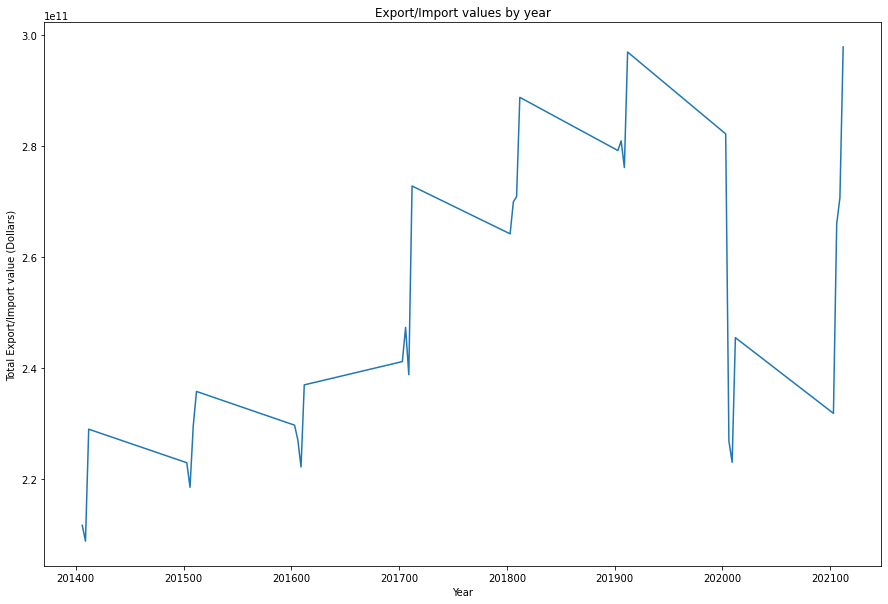

In [119]:
total_value_year.plot(figsize=(15,10))
plt.title("Export/Import values by year")
plt.xlabel('Year')
plt.ylabel('Total Export/Import value (Dollars)')

In [120]:
ts = data.groupby(['account', 'product_type'])['value'].agg(sum)
ts = ts.reset_index(level="account")
prodType_pt =  pd.pivot_table(ts, values='value', index=["account"], columns=["product_type"])
prodType_pt

product_type,Goods,Services
account,,
Exports,2.559589e+12,1.124526e+12
Imports,3.064132e+12,9.938104e+11


<AxesSubplot:xlabel='account'>

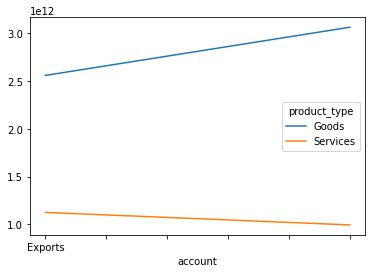

In [122]:
prodType_pt.plot()

## Through this analysis we've found some interesting results which seem to comply with reality. In the first plot we can see the value of all Importing/Explorting of all goods and services. As we can see in plot 1 there's a significant drop around march of 2020 which hold strong until around february 2021. However today there seems to be a significant almost full recovery. Looking at the pivot table plotwe can see that the demand for good far outweighs the demand for services, and through time the demand for good is increasing while the demand for services is decreasing. 
